In [ ]:
import random
from helpers import transform_features
from models.InterposePUF import InterposePUF
from tqdm import tqdm
from keras import layers
import keras
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
def train_dnn(challenges, responses):
    X_train, X_test, y_train, y_test = train_test_split(challenges, responses, test_size=.1)

    model = keras.Sequential()

    model.add(layers.Dense(50, input_dim=65, activation='relu'))
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dense(50, activation='relu'))

    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=100, batch_size=10000, shuffle=True, validation_split=0.01)

    results = model.evaluate(X_test, y_test, verbose=0)
    print('Test loss, Test accuracy:', results)

    return model, history

In [ ]:
challenges = np.memmap("crps/interpose_puf/3_3iPUF_chal_400000.memmap", shape=(400_000, 64)).tolist()
responses = np.memmap("crps/interpose_puf/3_3iPUF_resp_400000.memmap", shape=(400_000))

for chal in tqdm(challenges):
    chal.insert(32, random.randint(0, 1))

X_train = transform_features(np.array(challenges, dtype=np.int8))

100%|██████████| 400000/400000 [00:00<00:00, 1105586.25it/s]


In [14]:
model33_lower, history33_lower = train_dnn(X_train, responses)

Epoch 1/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5084 - loss: 0.7061 - val_accuracy: 0.5333 - val_loss: 0.6910
Epoch 2/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5334 - loss: 0.6902 - val_accuracy: 0.5394 - val_loss: 0.6878
Epoch 3/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5658 - loss: 0.6785 - val_accuracy: 0.6539 - val_loss: 0.6300
Epoch 4/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6867 - loss: 0.6003 - val_accuracy: 0.7094 - val_loss: 0.5649
Epoch 5/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7316 - loss: 0.5417 - val_accuracy: 0.7217 - val_loss: 0.5375
Epoch 6/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7432 - loss: 0.5150 - val_accuracy: 0.7397 - val_loss: 0.5107
Epoch 7/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7470 - loss: 0.4955 - val_accuracy: 0.7386 - val_loss: 0.4925
Epoch 8/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7488 - loss: 0.4780 - val_accu

In [ ]:
challenges = np.memmap("crps/interpose_puf/4_4iPUF_chal_1000000.memmap", shape=(1_000_000, 64)).tolist()
responses = np.memmap("crps/interpose_puf/4_4iPUF_resp_1000000.memmap", shape=(1_000_000))

for chal in tqdm(challenges):
    chal.insert(32, random.randint(0, 1))

X_train = transform_features(np.array(challenges, dtype=np.int8))

100%|██████████| 1000000/1000000 [00:00<00:00, 1206243.48it/s]


In [17]:
model44_lower, history44_lower = train_dnn(X_train, responses)

Epoch 1/500
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5013 - loss: 0.6948 - val_accuracy: 0.5176 - val_loss: 0.6926
Epoch 2/500
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5279 - loss: 0.6910 - val_accuracy: 0.5323 - val_loss: 0.6898
Epoch 3/500
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5480 - loss: 0.6860 - val_accuracy: 0.6107 - val_loss: 0.6596
Epoch 4/500
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6515 - loss: 0.6342 - val_accuracy: 0.6964 - val_loss: 0.6040
Epoch 5/500
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7050 - loss: 0.5876 - val_accuracy: 0.7167 - val_loss: 0.5521
Epoch 6/500
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7272 - loss: 0.5397 - val_accuracy: 0.7362 - val_loss: 0.5201
Epoch 7/500
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7390 - loss: 0.5093 - val_accuracy: 0.7370 - val_loss: 0.5013
Epoch 8/500
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7431 - loss: 0.4870 - val_accu

In [ ]:
challenges = np.memmap("crps/interpose_puf/5_5iPUF_chal_10000000.memmap", shape=(10_000_000, 64)).tolist()
responses = np.memmap("crps/interpose_puf/5_5iPUF_resp_10000000.memmap", shape=(10_000_000))

for chal in tqdm(challenges):
    chal.insert(32, random.randint(0, 1))

X_train = transform_features(np.array(challenges, dtype=np.int8))

100%|██████████| 10000000/10000000 [00:10<00:00, 947995.97it/s]


In [24]:
model55_lower, history55_lower = train_dnn(X_train, responses)

Epoch 1/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5016 - loss: 0.6991 - val_accuracy: 0.5055 - val_loss: 0.6930
Epoch 2/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5092 - loss: 0.6926 - val_accuracy: 0.5472 - val_loss: 0.6851
Epoch 3/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6080 - loss: 0.6596 - val_accuracy: 0.7054 - val_loss: 0.6124
Epoch 4/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7130 - loss: 0.6056 - val_accuracy: 0.7244 - val_loss: 0.5935
Epoch 5/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7295 - loss: 0.5885 - val_accuracy: 0.7327 - val_loss: 0.5829
Epoch 6/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7362 - loss: 0.5792 - val_accuracy: 0.7369 - val_loss: 0.5777
Epoch 7/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7396 - loss: 0.5740 - val_accuracy: 0.7382 - val_loss: 0.5752
Epoch 8/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7413 - loss: 0.5717 - val_accu

In [ ]:
challenges = np.memmap("crps/interpose_puf/6_6iPUF_chal_20000000.memmap", shape=(20_000_000, 64)).tolist()
responses = np.memmap("crps/interpose_puf/6_6iPUF_resp_20000000.memmap", shape=(20_000_000))

for chal in tqdm(challenges):
    chal.insert(32, random.randint(0, 1))

X_train = transform_features(np.array(challenges, dtype=np.int8))

100%|██████████| 20000000/20000000 [00:20<00:00, 967892.82it/s] 


In [27]:
model66_lower, history66_lower = train_dnn(X_train, responses)

Epoch 1/100
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.5006 - loss: 0.6940 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/100
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5038 - loss: 0.6930 - val_accuracy: 0.5554 - val_loss: 0.6807
Epoch 3/100
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6250 - loss: 0.6505 - val_accuracy: 0.7224 - val_loss: 0.5936
Epoch 4/100
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7271 - loss: 0.5882 - val_accuracy: 0.7370 - val_loss: 0.5771
Epoch 5/100
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7374 - loss: 0.5764 - val_accuracy: 0.7411 - val_loss: 0.5719
Epoch 6/100
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7407 - loss: 0.5723 - val_accuracy: 0.7430 - val_loss: 0.5699
Epoch 7/100
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7422 - loss: 0.5704 - val_accuracy: 0.7436 - val_loss: 0.5688
Epoch 8/100
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7427 -

In [4]:
challenges = np.memmap("crps/interpose_puf/7_7iPUF_chal_40000000.memmap", shape=(40_000_000, 64)).tolist()
responses = np.memmap("crps/interpose_puf/7_7iPUF_resp_40000000.memmap", shape=(40_000_000))

for chal in tqdm(challenges):
    chal.insert(32, random.randint(0, 1))

X_train = transform_features(np.array(challenges, dtype=np.int8))
del challenges

100%|██████████| 40000000/40000000 [00:57<00:00, 696263.20it/s]


In [5]:
model77_lower, history77_lower = train_dnn(X_train, responses)

/Users/oisinkelly/miniforge3/envs/tf_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
3564/3564 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.5000 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
3564/3564 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.5005 - loss: 0.6931 - val_accuracy: 0.4999 - val_loss: 0.6932
Epoch 3/100
3564/3564 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.5006 - loss: 0.6931 - val_accuracy: 0.5065 - val_loss: 0.6920
Epoch 4/100
3564/3564 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.5734 - loss: 0.6675 - val_accuracy: 0.7266 - val_loss: 0.5871
Epoch 5/100
3564/3564 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.7321 - loss: 0.5808 - val_accuracy: 0.7374 - val_loss: 0.5745
Epoch 6/100
3564/3564 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.7396 - loss: 0.5724 - val_accuracy: 0.7393 - val_loss: 0.5721
Epoch 7/100
3564/3564 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7413 - loss: 0.5704 - val_accuracy: 0.7407 - val_loss: 0.5708
Epoch 8/100
3564/3564 ━━━━━━━━━━━━━━━━━━━━ 29s 8ms/step - accuracy: 0.7418 -

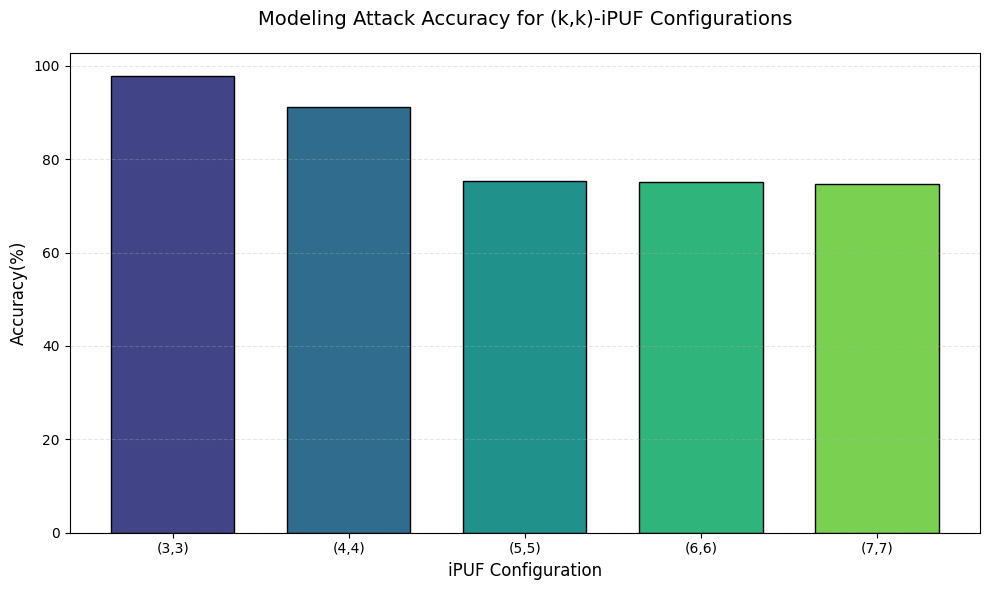

In [16]:
configurations = ['(3,3)', '(4,4)', '(5,5)', '(6,6)', '(7,7)']
accuracy = [97.9, 91.2, 75.4, 75.2, 74.6]

plt.figure(figsize=(10, 6))
bars = plt.bar(configurations, accuracy, 
               width=0.7,
               color=plt.cm.viridis(np.linspace(0.2, 0.8, len(configurations))),
               edgecolor='black',
               linewidth=1)

plt.title('Modeling Attack Accuracy for (k,k)-iPUF Configurations', fontsize=14, pad=20)
plt.xlabel('iPUF Configuration', fontsize=12)
plt.ylabel('Accuracy(%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()